In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math

In [211]:
df = pd.read_csv("../resources/train.csv")
df_raw = df.copy()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [5]:
aux = df.isnull().sum()
aux, aux.sum()

(PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 2324)

EDA

In [124]:
def plot_two_vars(df: pd.DataFrame, main_col: str, cols):
    ratio = 3
    n = len(cols)
    fig, axes = plt.subplots(math.ceil(n/ratio), min(ratio, n), figsize=(7*min(ratio, n), 5*(math.ceil(n/ratio))))
    
    for idx, col in enumerate(cols):
        if n==1:
            ax = axes
        elif n <= ratio:
            ax=axes[idx%ratio]
        else:
            ax=axes[int(idx/ratio), idx%ratio]

        type = df[col].dtype
        if pd.api.types.is_numeric_dtype(type):
            sns.barplot(ax=ax, x = main_col, y = col, data = df);
        else:
            aux = df.groupby(main_col)[col].value_counts(normalize=True, dropna=False).reset_index(name='NormalizedCounts')
    
            sns.barplot(ax=ax, data=aux, x=main_col, y='NormalizedCounts', hue=col)
            #sns.histplot(ax=ax, x = main_col, hue = col, data = df, stat="count", multiple="stack")

In [7]:
import warnings
warnings.filterwarnings("ignore")

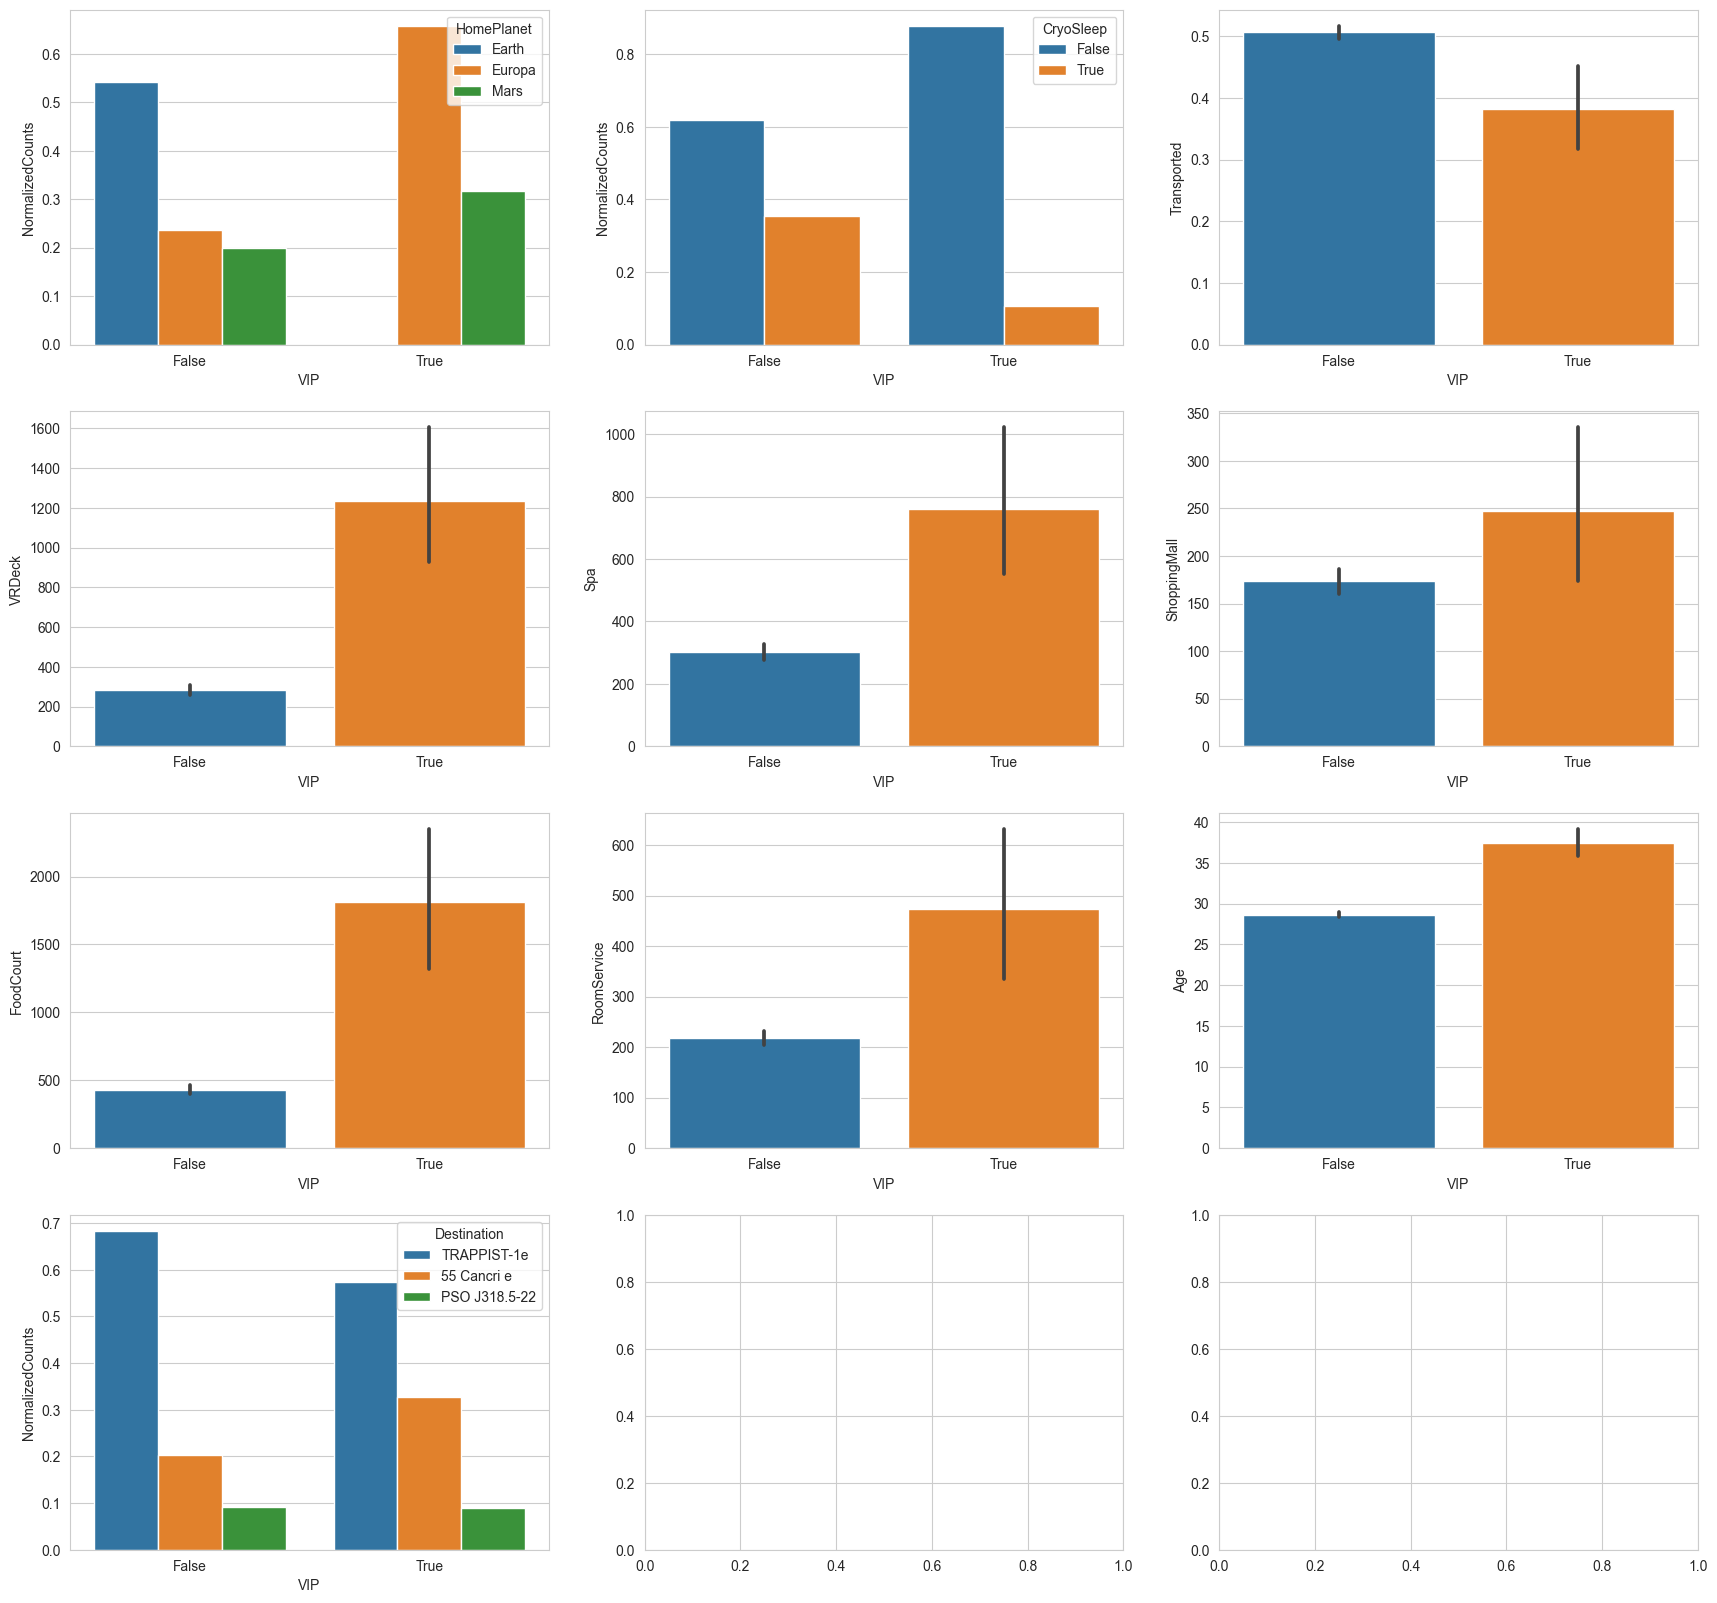

In [9]:

plot_two_vars(df, "VIP", ['HomePlanet','CryoSleep','Transported',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Age', 'Destination'])


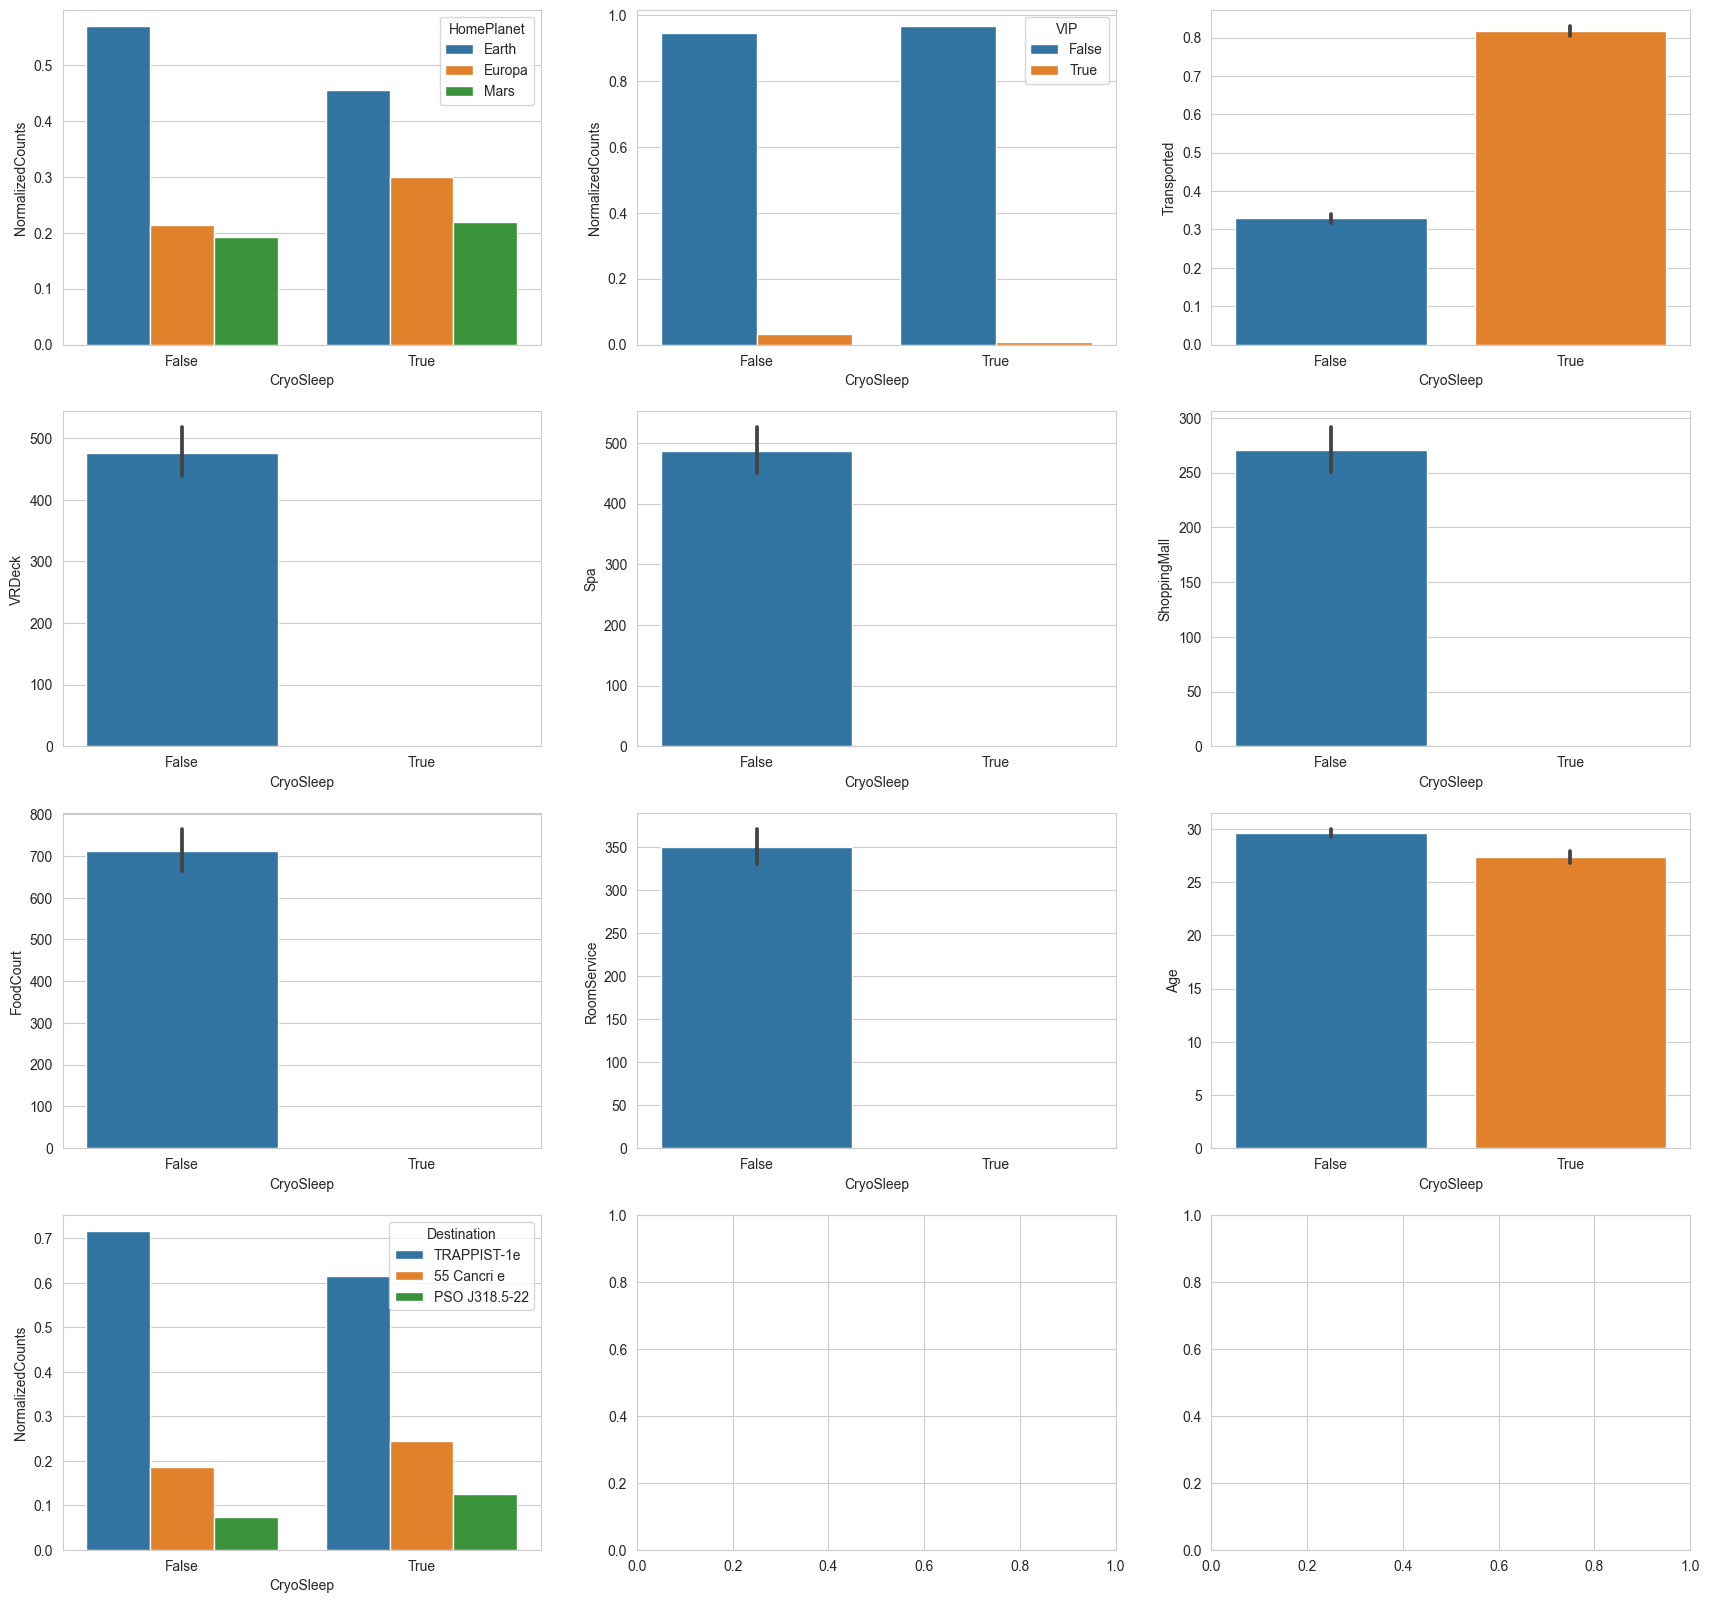

In [10]:
plot_two_vars(df, 'CryoSleep', ['HomePlanet', 'VIP','Transported',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Age', 'Destination'])

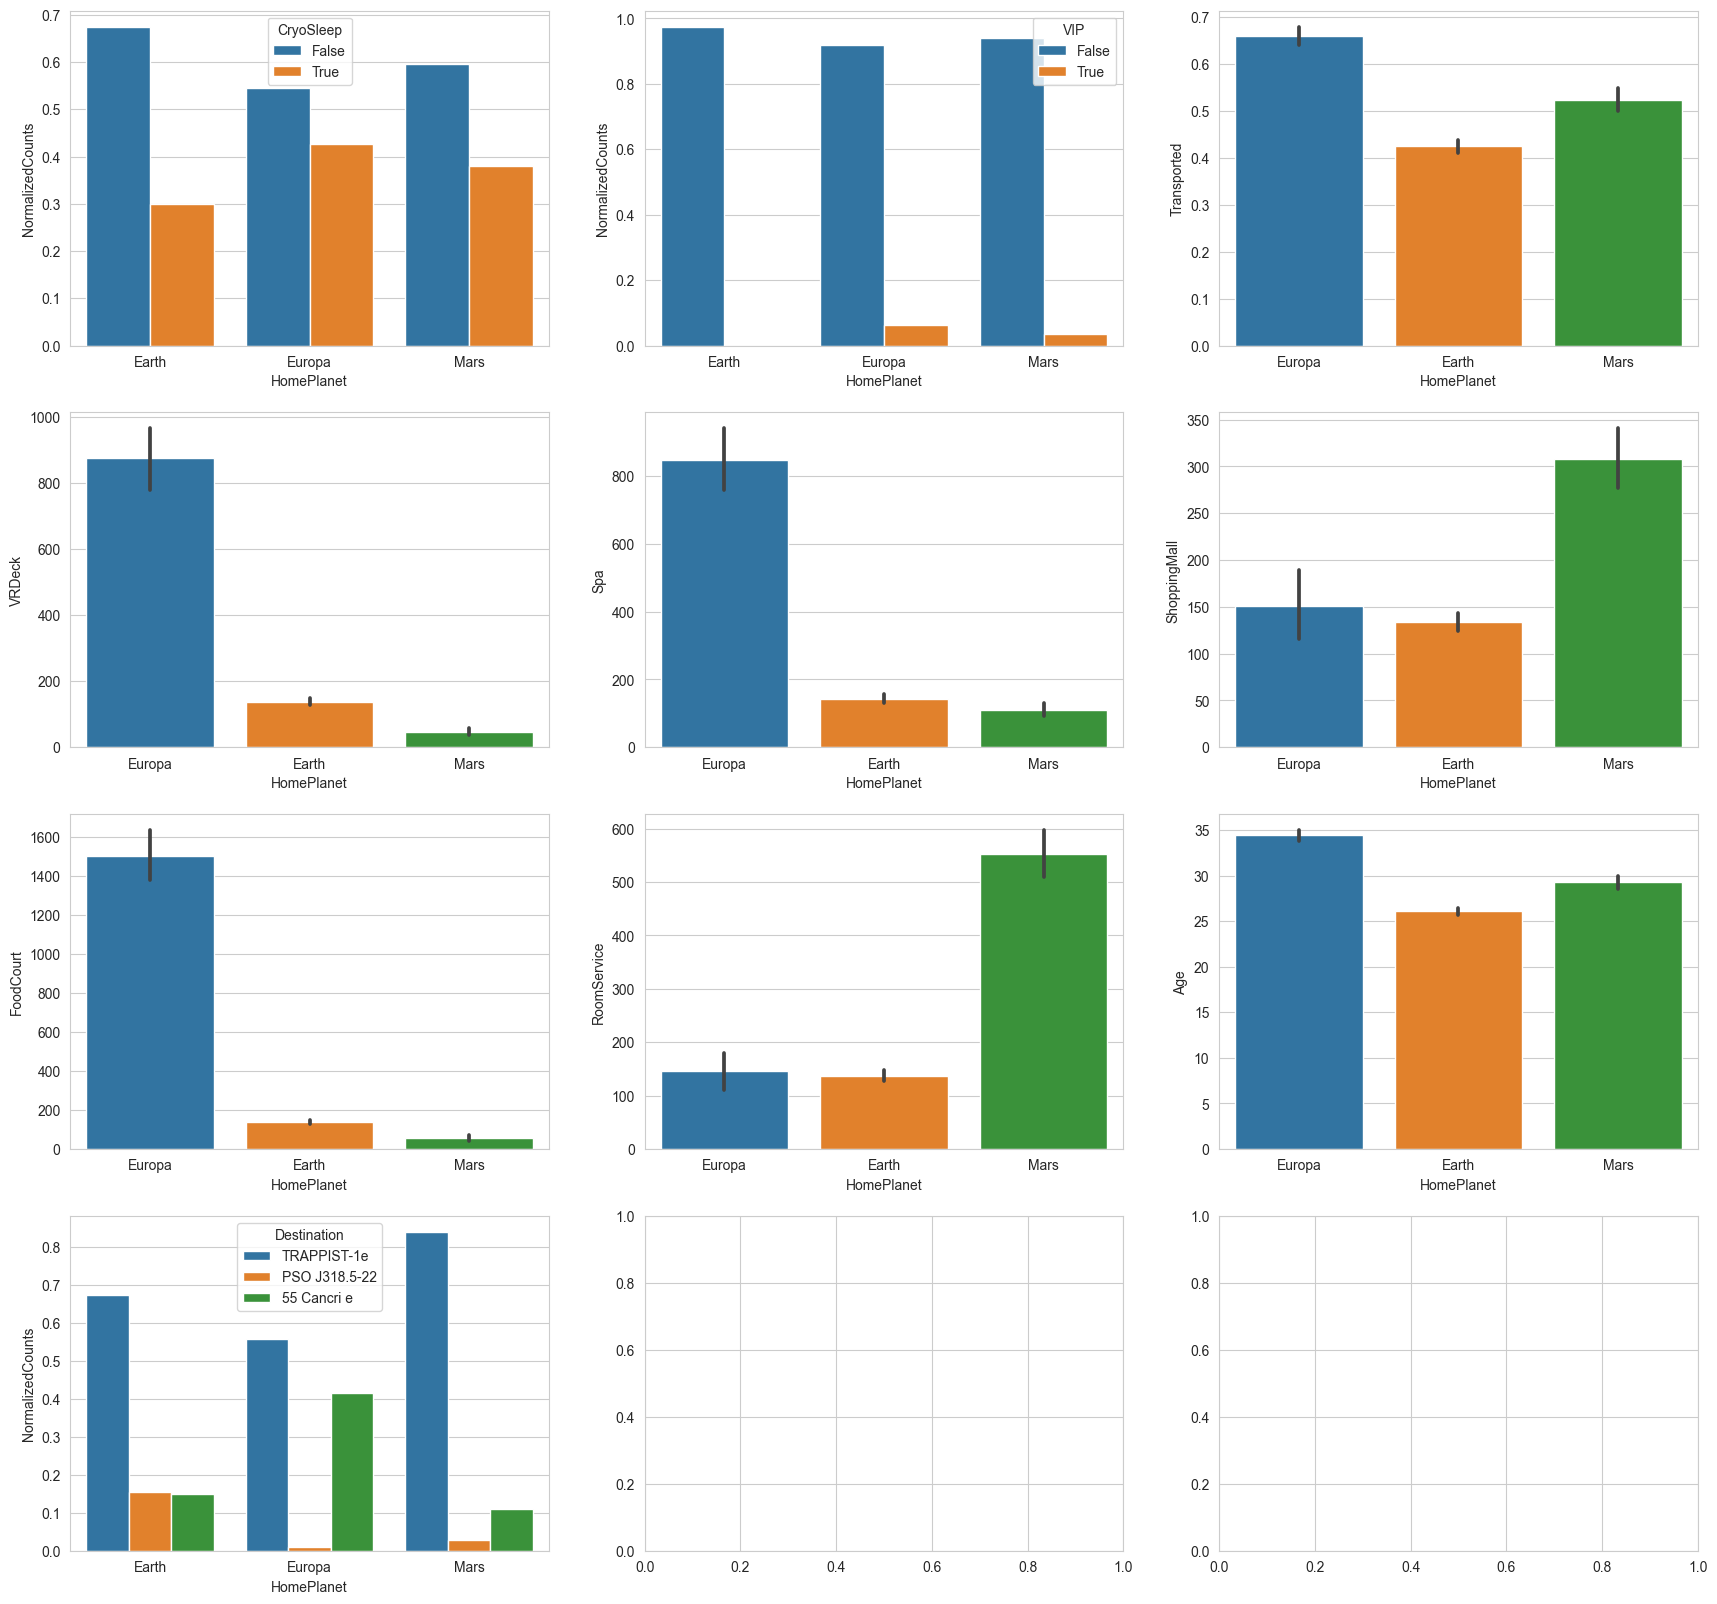

In [8]:
plot_two_vars(df, "HomePlanet", ['CryoSleep','VIP','Transported',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Age', 'Destination'])

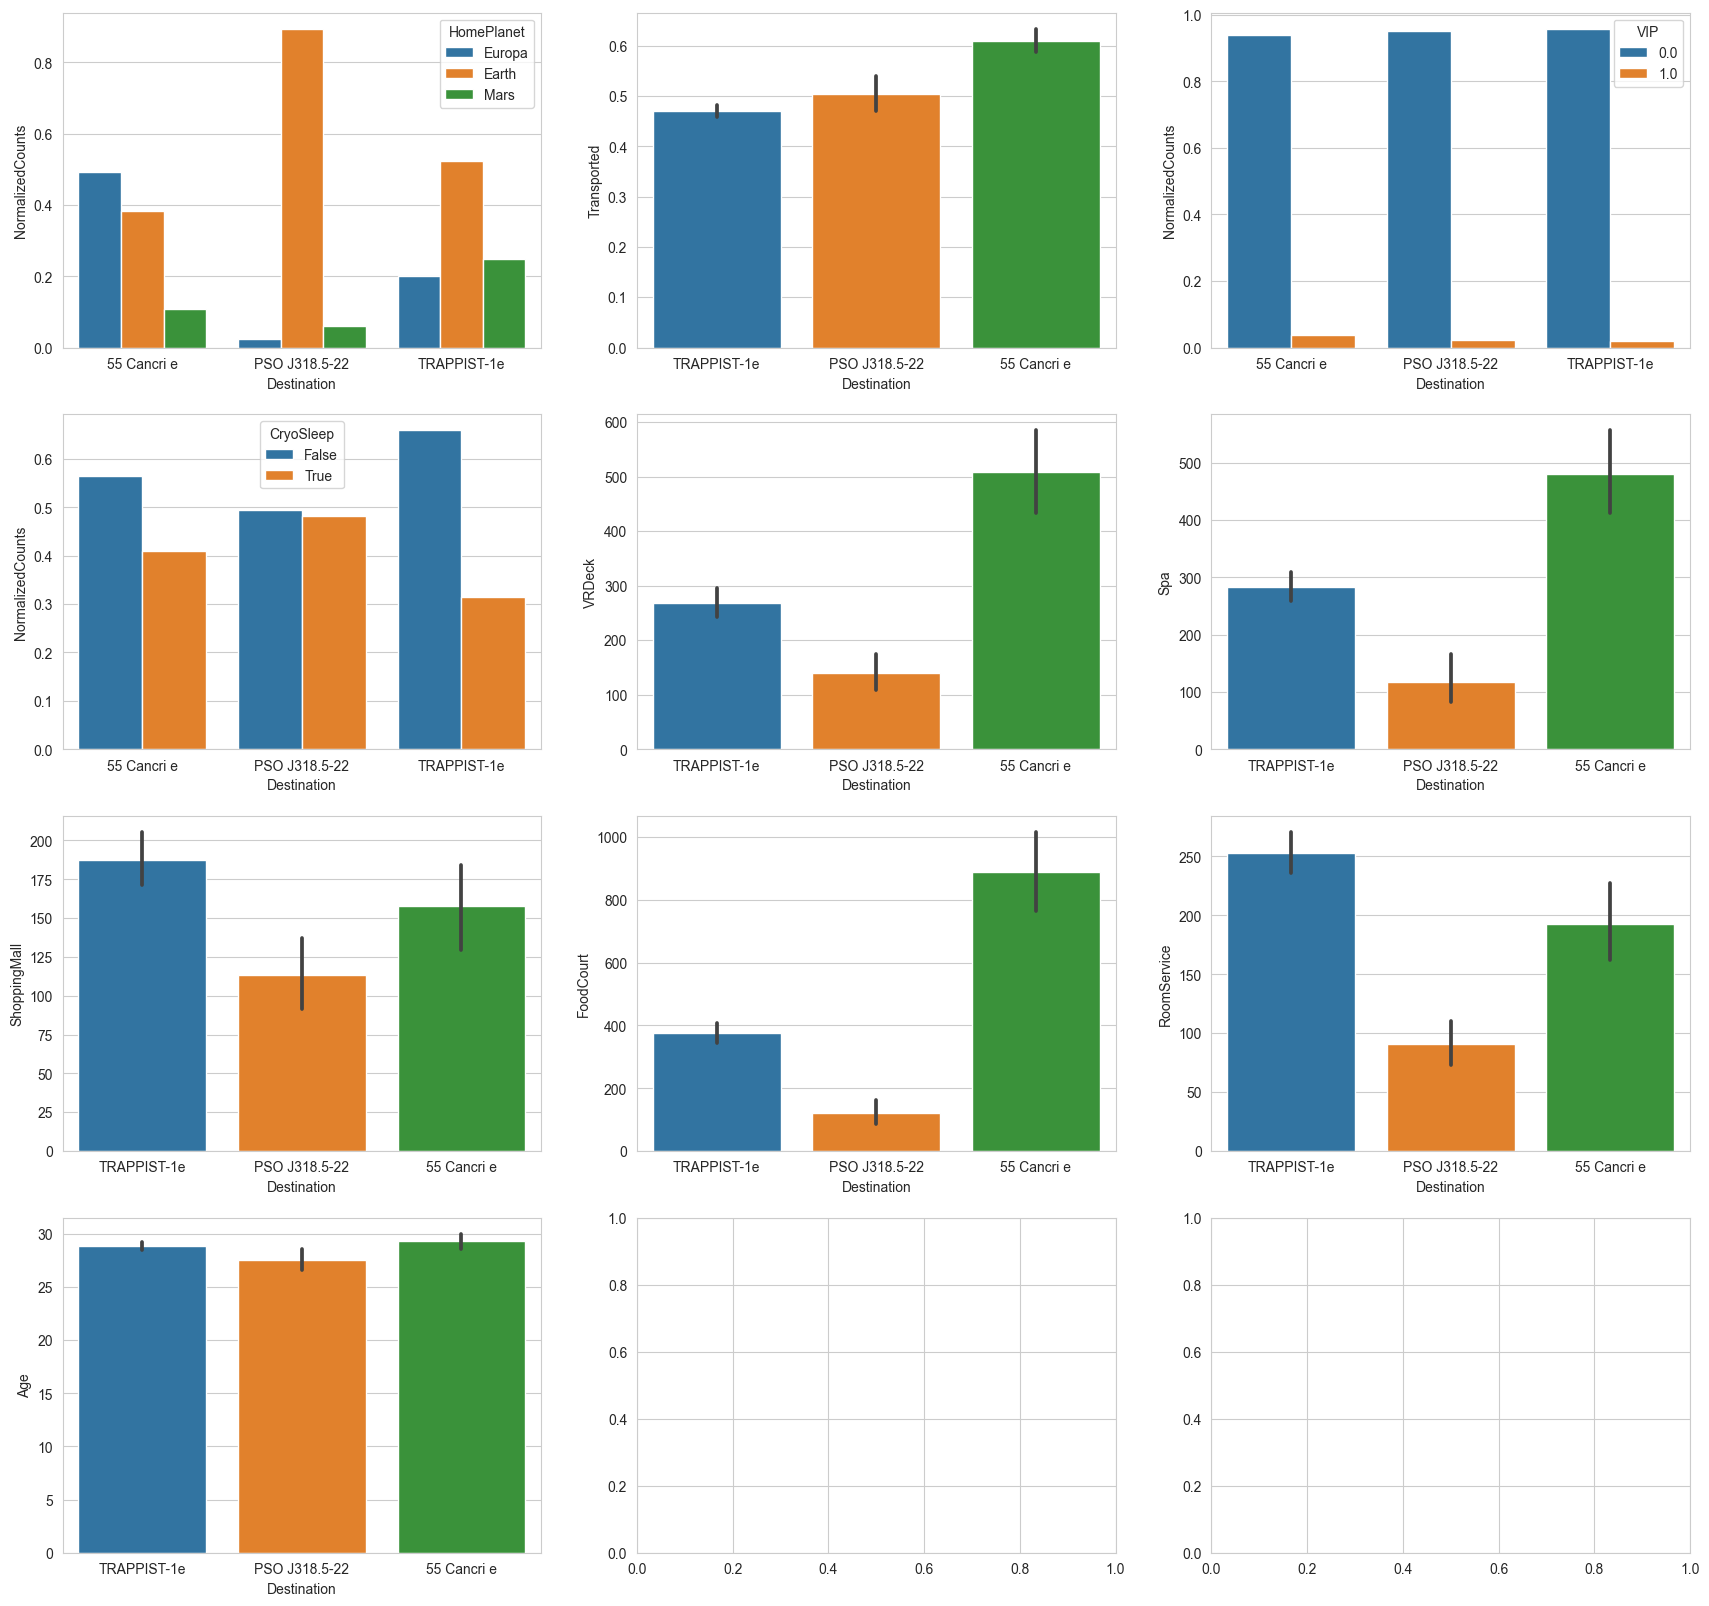

In [95]:
plot_two_vars(df, 'Destination', ['HomePlanet','Transported' , 'VIP', 'CryoSleep',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Age'])

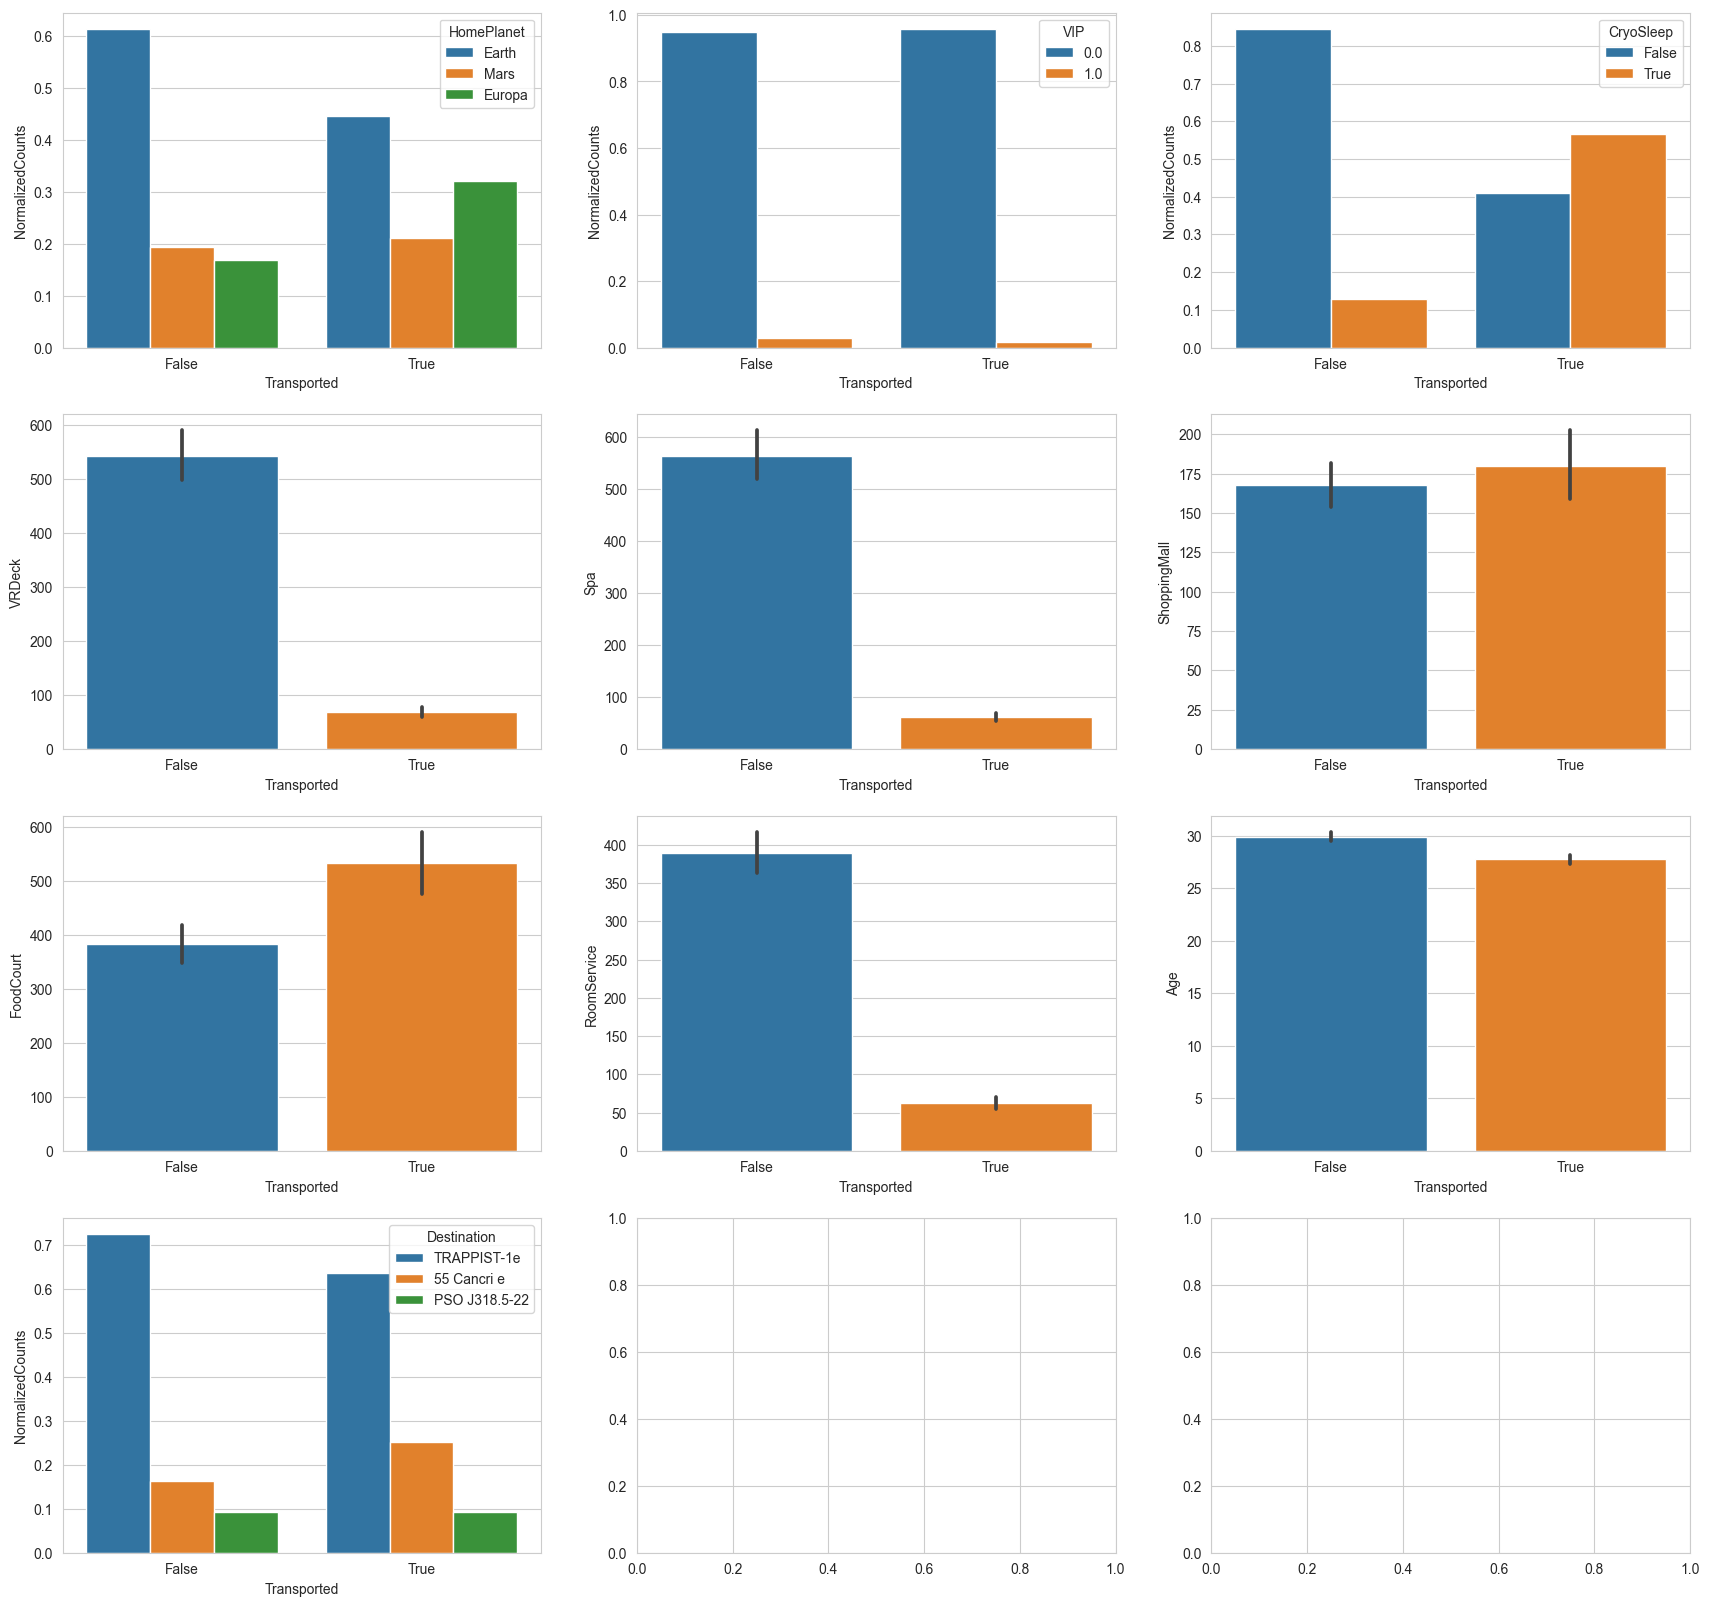

In [94]:
plot_two_vars(df,'Transported', ['HomePlanet', 'VIP', 'CryoSleep',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Age', 'Destination'])

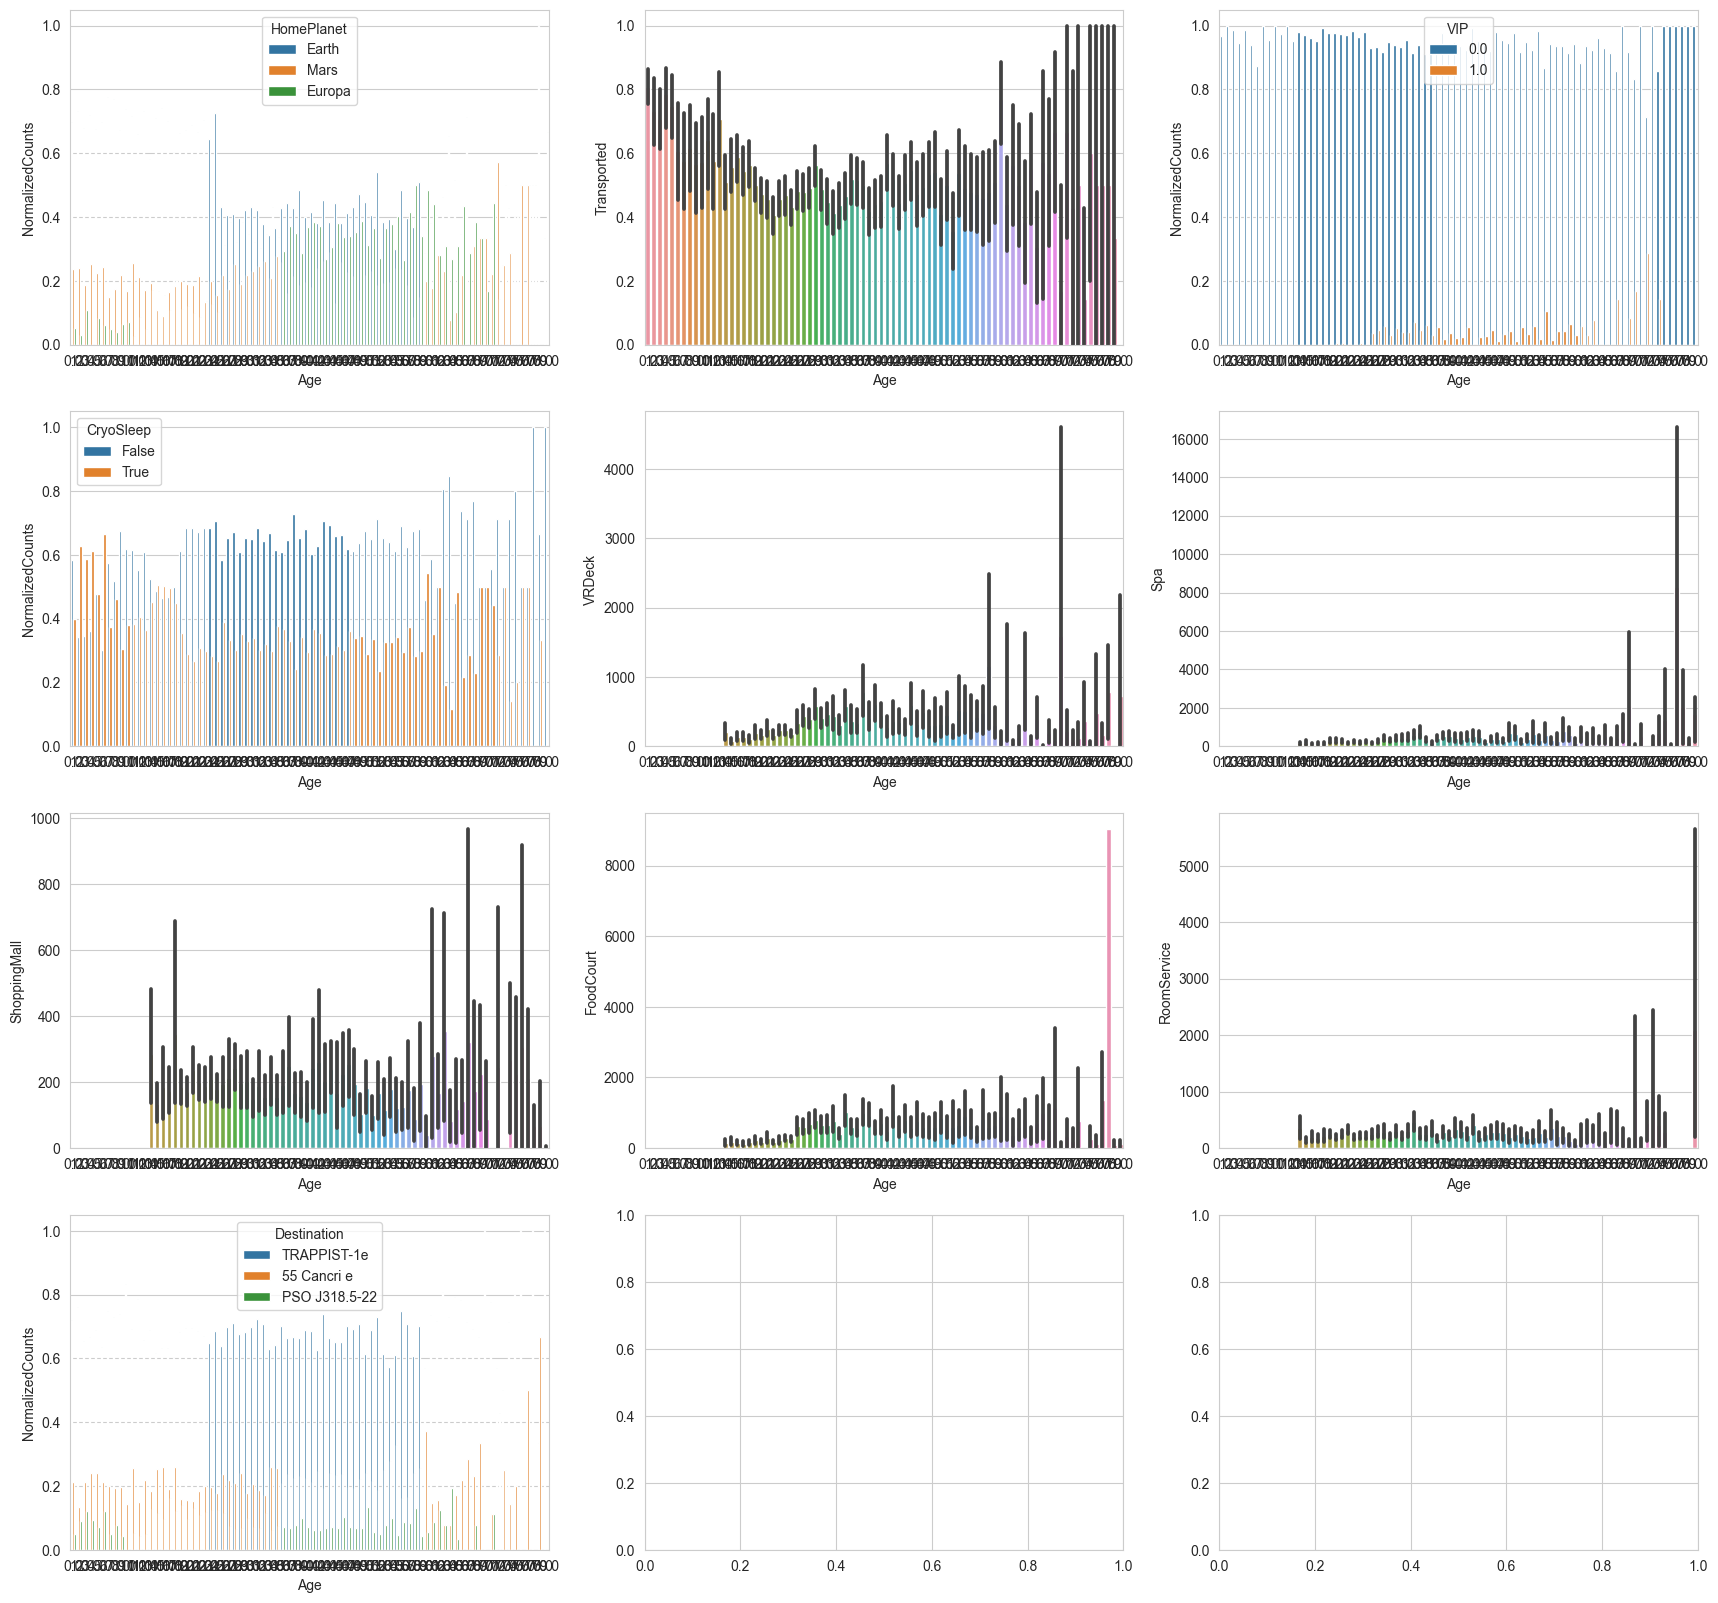

In [96]:
plot_two_vars(df, 'Age', ['HomePlanet','Transported' , 'VIP', 'CryoSleep',
                                 'VRDeck','Spa','ShoppingMall','FoodCourt','RoomService',
                                 'Destination'])

In [98]:
df.groupby("Age")[["Spa", "VRDeck", "ShoppingMall", "RoomService", "FoodCourt"]].aggregate(["min", "max"])   

Spa          VRDeck         ShoppingMall         RoomService          \
        min      max    min     max          min     max         min     max   
Age                                                                            
0.0     0.0      0.0    0.0     0.0          0.0     0.0         0.0     0.0   
1.0     0.0      0.0    0.0     0.0          0.0     0.0         0.0     0.0   
2.0     0.0      0.0    0.0     0.0          0.0     0.0         0.0     0.0   
3.0     0.0      0.0    0.0     0.0          0.0     0.0         0.0     0.0   
4.0     0.0      0.0    0.0     0.0          0.0     0.0         0.0     0.0   
...     ...      ...    ...     ...          ...     ...         ...     ...   
75.0    0.0    131.0    0.0  1769.0          0.0  1224.0         0.0     0.0   
76.0    0.0  16594.0    0.0   330.0          0.0   422.0         0.0     0.0   
77.0  128.0   3981.0  108.0  1464.0          0.0   131.0         0.0     0.0   
78.0    0.0    441.0    0.0     4.0          0.0   202.0         0.0     0.0   
79.0  200.0   2579.0    2.0  2175.0          0.0     7.0         0.0  5649.0   

     FoodCourt          
           min     max  
Age                     
0.0        0.0     0.0  
1.0        0.0     0.0  
2.0        0.0     0.0  
3.0        0.0     0.0  
4.0        0.0     0.0  
...        ...     ...  
75.0       0.0   493.0  
76.0       0.0  2732.0  
77.0    9032.0  9032.0  
78.0       0.0   213.0  
79.0       0.0   235.0  

[80 rows x 10 columns]

NULL VALUES

In [6]:
import statistics
def find_same_group(df: pd.DataFrame, group:str, val_column:str):
    return df[(df.Group == group) & (~df[val_column].isna())]
def replace_null_values_with_group_agg(df: pd.DataFrame, val_column: str):
    for index, row in df.iterrows():
        if pd.isna(row[val_column]):
            group = row['Group']
            same_group_rows = find_same_group(df, group, val_column)
            if not same_group_rows.empty:
                values = same_group_rows[val_column]
                if pd.api.types.is_numeric_dtype(df[val_column].dtype):
                    df.at[index, val_column] = values.mean()
                else:
                    df.at[index, val_column] = statistics.mode(values)


In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

def replace_null_values(df: pd.DataFrame):
    replace_null_values_with_group_agg(df, 'HomePlanet')
    replace_null_values_with_group_agg(df, 'Destination')
    df.loc[(df.VIP.isna()) & (df.HomePlanet=='Earth'),'VIP'] = False
    df.loc[(df.CryoSleep.isna()) & (df.VIP==True),'CryoSleep'] = False
    df.loc[(df.Spa.isna()) & ((df.CryoSleep==True)|(df.Age<=12)),'Spa'] = 0
    df.loc[(df.VRDeck.isna()) & ((df.CryoSleep==True)|(df.Age<=12)),'VRDeck'] = 0
    df.loc[(df.ShoppingMall.isna()) & ((df.CryoSleep==True)|(df.Age<=12)),'ShoppingMall'] = 0
    df.loc[(df.RoomService.isna()) & ((df.CryoSleep==True)|(df.Age<=12)),'RoomService'] = 0
    df.loc[(df.FoodCourt.isna()) & ((df.CryoSleep==True)|(df.Age<=12)),'FoodCourt'] = 0
    df.loc[(df.HomePlanet.isna()) & (df.Destination=='PSO J318.5-22'),'HomePlanet'] = 'Earth'
    df.loc[(df.VIP.isna()) & (df.Age<18),'VIP'] = False
    df.loc[(df.CryoSleep.isna()) & ((df.Spa>0)|(df.VRDeck>0)|(df.ShoppingMall>0)|(df.RoomService>0)|(df.FoodCourt>0)),'CryoSleep'] = False
    return df
def knn_fill_null_values(df: pd.DataFrame):
    columns = df.columns
    encFeatures = df.select_dtypes(["object"]).columns
    lbe = OrdinalEncoder()

    df[encFeatures]= lbe.fit_transform(df[encFeatures])
        
    imputer = KNNImputer(n_neighbors=4)
    df = imputer.fit_transform(df)
    df = pd.DataFrame(df,columns=columns)
    
    df[encFeatures] = lbe.inverse_transform(df[encFeatures])
    return df

def prepare_data(df: pd.DataFrame):
    df[["Group", "Group_ind"]] = df["PassengerId"].str.split("_", expand=True)
    df['LastName'] = df["Name"].str.split(" ", expand=True)[1]
    df = df.assign(AggregateCost = lambda x: (x.RoomService+x.FoodCourt+x.ShoppingMall+x.Spa+x.VRDeck)/5)
    
    df = replace_null_values(df)
    df = knn_fill_null_values(df)
    
    df = pd.get_dummies(df,columns=['HomePlanet', 'Destination'], dtype=float)
    
    df = df.drop(columns=['PassengerId','Cabin','Name','Group','Group_ind','LastName'])
    df.CryoSleep = df.CryoSleep.astype(float)
    df.VIP = df.VIP.astype(float)
    df.insert(len(df.columns)-1, 'VIP', df.pop('VIP'))
    df.insert(len(df.columns)-1, 'CryoSleep', df.pop('CryoSleep'))
    return df

In [212]:
df = prepare_data(df)

In [213]:
df_target = df.Transported
df = df.drop(columns=['Transported'])

In [214]:
df_filtrado = df.loc[:,'Age':'AggregateCost']
means = df_filtrado.mean(axis=0)
stds = df_filtrado.std(axis=0)
up_limit = means + 4*stds
inf_limit = means - 4*stds

In [215]:
df_filtrado = df_filtrado[~((df_filtrado > up_limit) | (df_filtrado < inf_limit)).any(axis=1)]
df_filtrado

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AggregateCost
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,147.2
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1035.2
4,16.0,303.0,70.0,151.0,565.0,2.0,218.2
5,44.0,0.0,483.0,0.0,291.0,0.0,154.8
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1707.2
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,374.6
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,927.4


In [216]:
df = df.loc[df_filtrado.index]

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_columns_df = df.loc[:,'Age':'AggregateCost']
std_columns = std_columns_df.columns
scaler.fit(std_columns_df)

StandardScaler()

In [217]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
std_columns_df = df.loc[:,'Age':'AggregateCost']
std_columns = std_columns_df.columns
scaler.fit(std_columns_df)

MinMaxScaler()

In [218]:
df.loc[:,std_columns] = scaler.transform(df.loc[:,std_columns])
df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AggregateCost,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP,CryoSleep
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.303797,0.038380,0.001320,0.009769,0.114090,0.009114,0.060141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.417722,0.000000,0.188151,0.144979,0.691812,0.039975,0.422945,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.202532,0.106690,0.010265,0.059007,0.117415,0.000414,0.089149,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.556962,0.000000,0.070832,0.000000,0.060474,0.000000,0.063246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,1.000000,0.000000,0.341438,0.015327,0.697500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8690,0.329114,0.000000,0.000000,0.731536,0.000208,0.000000,0.153048,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8691,0.405063,0.000000,0.153835,0.000000,0.073358,0.670050,0.378902,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


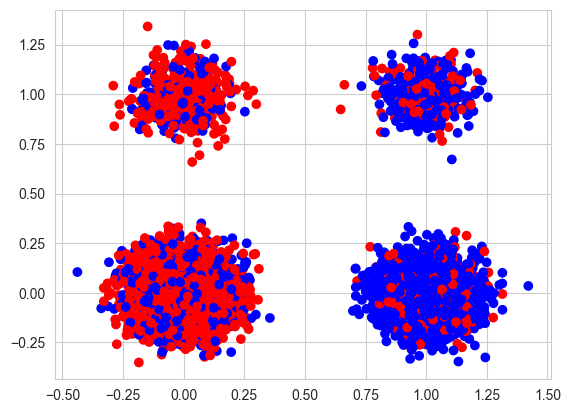

In [77]:
plt.scatter(df.CryoSleep + np.random.normal(0, 0.1, len(df)), 
            df['Destination_PSO J318.5-22']+ np.random.normal(0, 0.1, len(df)), 
            c=df_target.map({1.0: 'blue', 0.0: 'red'}))

In [48]:
all_df = df.copy()
all_df['Transported'] = df_target

In [78]:
print(all_df.groupby(['CryoSleep','Destination_PSO J318.5-22'])["Transported"].value_counts(normalize=True))



CryoSleep  Destination_PSO J318.5-22  Transported
0.0        0.0                        0.0            0.668090
                                      1.0            0.331910
           1.0                        0.0            0.663848
                                      1.0            0.336152
1.0        0.0                        1.0            0.835832
                                      0.0            0.164168
           1.0                        1.0            0.697500
                                      0.0            0.302500
Name: proportion, dtype: float64


In [72]:
from itertools import combinations
columns = all_df.loc[:,'HomePlanet_Earth':'CryoSleep']

for c1,c2 in combinations(columns,2):
    if c1!=c2:
        r = all_df.groupby([c1,c2])["Transported"].value_counts(normalize=True)
        r = r.reset_index(name='result')
        r = r[r.result>=0.81]
        if len(r)>0:
            print(r)

   HomePlanet_Earth  VIP  Transported  result
6               1.0  1.0          1.0     1.0
   HomePlanet_Earth  CryoSleep  Transported    result
2               0.0        1.0          1.0  0.957187
   HomePlanet_Europa  VIP  Transported    result
2                0.0  1.0          0.0  0.833333
   HomePlanet_Europa  CryoSleep  Transported    result
6                1.0        1.0          1.0  0.989463
   HomePlanet_Mars  VIP  Transported    result
6              1.0  1.0          0.0  0.846154
   HomePlanet_Mars  CryoSleep  Transported    result
6              1.0        1.0          1.0  0.912536
   Destination_55 Cancri e  CryoSleep  Transported    result
6                      1.0        1.0          1.0  0.929615
   Destination_PSO J318.5-22  CryoSleep  Transported    result
2                        0.0        1.0          1.0  0.835832
   Destination_TRAPPIST-1e  CryoSleep  Transported    result
2                      0.0        1.0          1.0  0.849089
   VIP  CryoSleep  Tra

In [201]:
def additional_rules(df: pd.DataFrame):
    pos_indices = df[(df.VIP==1)&(df.HomePlanet_Earth==1)].index.union(df[(df.HomePlanet_Earth==0)&(df.CryoSleep==1)].index.union
                     (df[(df.HomePlanet_Europa==1)&(df.CryoSleep==1)].index.union
                      (df[(df.HomePlanet_Mars==1)&(df.CryoSleep==1)].index.union
                       (df[(df['Destination_55 Cancri e']==1)&(df.CryoSleep==1)].index.union
                        (df[(df['Destination_PSO J318.5-22']==0)&(df.CryoSleep==1)].index.union
                         (df[(df['Destination_TRAPPIST-1e']==0)&(df.CryoSleep==1)].index.union
                          (df[(df.VIP==1)&(df.CryoSleep==1)].index)))))))
    neg_indices = df[(df.HomePlanet_Europa==0)&(df.VIP==1)].index.union(df[(df.HomePlanet_Mars==1)&(df.VIP==1)].index)
    return neg_indices,pos_indices

In [305]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

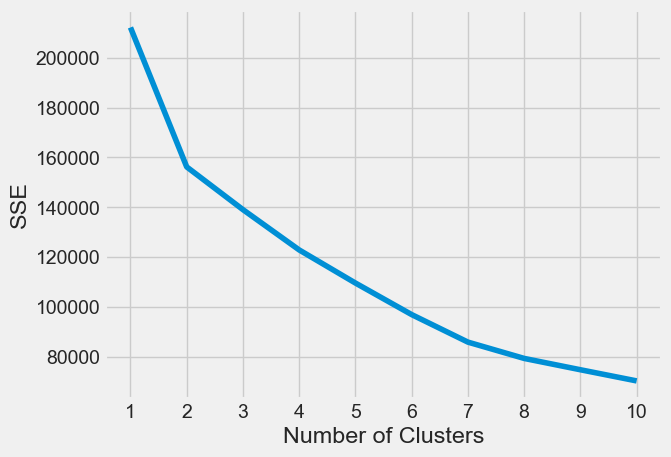

In [309]:
%matplotlib inline
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [310]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

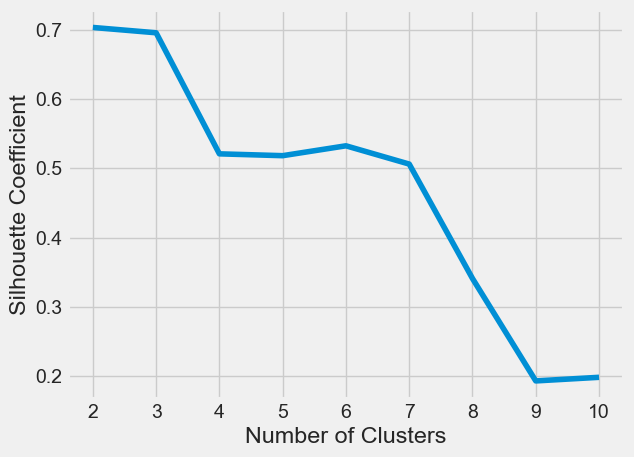

In [311]:

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [330]:
from sklearn.cluster import DBSCAN, SpectralClustering

df_c = all_df.copy()
kmeans = SpectralClustering(n_jobs=-1)
df_c['Cluster'] = kmeans.fit_predict(df)
r = df_c.groupby('Cluster')['Transported'].value_counts(normalize=True)
print(df_c.groupby('Cluster')['Transported'].value_counts())
print(r)

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [36]:
%matplotlib notebook
def plot_25d_optimization(scores_matrix, col1, col2, col1_name: str='x', col2_name: str='y'):
    plt.figure(figsize=(9, 9))
    ax = plt.subplot(projection='3d')
    means=np.mean(scores_matrix,axis=2)
    sds=np.std(scores_matrix,axis=2)
    lower_limit = means - sds
    upper_limit = means + sds
    for i in range(len(col1)):
        xs=np.full((len(col2),), col1[i])
        ys=col2
        ax.plot(xs, ys, means[i], color="#5577ff")
        ax.add_collection3d(plt.fill_between(ys, lower_limit[i], upper_limit[i], color="#55ffca",alpha=0.05), zs=col1[i], zdir='x')
    
    ax.set_xlabel(col1_name)
    ax.set_ylabel(col2_name)
    ax.set_zlabel('Accuracy')
    ax.set_zticks(np.linspace(0.5,1.0,10))

In [115]:
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

def plot_3d_optimization(scores_matrix, col1, col2, col1_name: str='x', col2_name: str='y',norm=False):
    scores_matrix_avg = np.empty((len(scores_matrix),len(scores_matrix[0])))
    for i in range(len(scores_matrix)):
        for j in range(len(scores_matrix[i])):
            scores_matrix_avg[i][j] = scores_matrix[i][j].mean()
            
    z = scores_matrix_avg.transpose()
    nrows, ncols = z.shape
    if norm:
        x = np.arange(0, ncols, 1)
        y = np.arange(0, nrows, 1)
    else:
        x = np.linspace(col1.min(), col1.max(), ncols)
        y = np.linspace(col2.min(), col2.max(), nrows)
    x, y = np.meshgrid(x, y)
    
    # Set up plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
    
    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=False, shade=False)
    ax.set_xlabel(col1_name)
    ax.set_ylabel(col2_name)
    
    plt.show()

In [219]:
#indices = df[df.HomePlanet_Earth==1].index
indices = df.index

In [220]:
#x_train, x_test, y_train, y_test = train_test_split(df.loc[indices].drop(columns=['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars']), df_target.loc[indices], test_size=0.1, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(df.loc[indices], df_target.loc[indices], test_size=0.1, random_state=1)
len(x_train)

7400

In [221]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.772782503037667


In [222]:


knn = KNeighborsClassifier(
    n_neighbors=3,
    weights="distance",
    leaf_size=1
)
knn.fit(x_train,y_train.astype(bool))
y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))

Accuracy: 0.755771567436209


In [41]:


print("KNN CV Accuracy Score: %.4f"% cross_val_score(knn, x_test, y_test,cv = 5, scoring = "accuracy").mean())

KNN CV Accuracy Score: 0.7267


In [224]:


rf = RandomForestClassifier(n_estimators=30,max_depth=8,max_features=9,min_samples_split=10,random_state=1)
scores = cross_validate(rf, x_train, y_train, scoring='accuracy', 
                        cv=5, return_train_score=False,n_jobs=-1)

scores['test_score']

array([0.79391892, 0.79527027, 0.78108108, 0.79256757, 0.78783784])

In [245]:
xps=np.arange(5,15,1)
yps=np.arange(5,15,1)
scores_matrix=np.empty((len(xps),len(yps),5))
for i in range(len(xps)):
    for j in range(len(yps)):
        model = RandomForestClassifier(n_estimators=30,max_depth=xps[i],max_features=yps[j],min_samples_split=10,random_state=1)
        scores = cross_validate(model, x_train, y_train, scoring='accuracy', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        print((i*len(yps)+j)/(len(yps)*len(xps)),xps[i],yps[j],scores_matrix[i][j].mean())

0.0 5 5 0.7822972972972974
0.01 5 6 0.7798648648648648
0.02 5 7 0.7827027027027027
0.03 5 8 0.7812162162162162
0.04 5 9 0.782972972972973
0.05 5 10 0.7854054054054054
0.06 5 11 0.7855405405405406
0.07 5 12 0.7882432432432431
0.08 5 13 0.7856756756756758
0.09 5 14 0.7843243243243243
0.1 6 5 0.7847297297297298
0.11 6 6 0.7862162162162163
0.12 6 7 0.7858108108108108
0.13 6 8 0.7867567567567567
0.14 6 9 0.7886486486486486
0.15 6 10 0.7851351351351351
0.16 6 11 0.7886486486486486
0.17 6 12 0.7856756756756758
0.18 6 13 0.7859459459459459
0.19 6 14 0.7851351351351351
0.2 7 5 0.7825675675675676
0.21 7 6 0.7866216216216216
0.22 7 7 0.7886486486486486
0.23 7 8 0.787027027027027
0.24 7 9 0.7878378378378378
0.25 7 10 0.787027027027027
0.26 7 11 0.7887837837837838
0.27 7 12 0.7875675675675675
0.28 7 13 0.7889189189189189
0.29 7 14 0.7863513513513514
0.3 8 5 0.787972972972973
0.31 8 6 0.787972972972973
0.32 8 7 0.788918918918919
0.33 8 8 0.7878378378378379
0.34 8 9 0.7901351351351352
0.35 8 10 0.788

In [246]:
plt.close()
plot_3d_optimization(scores_matrix,xps,yps,'max_depth','max_features')

<IPython.core.display.Javascript object>

In [199]:
y_pred = pd.Series(y_pred,y_test.index)


In [200]:
neg_ids,pos_ids = additional_rules(x_test)
y_pred[neg_ids]=False
y_pred[pos_ids]=True

In [201]:
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))

Accuracy: 0.7963957055214724


In [247]:


lgb_tuned = LGBMClassifier(random_state=1,
                           n_estimators=50,
                           subsample=0.01,
                           learning_rate=0.05,
                           max_depth = 6,
                           min_child_samples=2,
                           num_leaves = 20,                      
                       
                            force_col_wise=True)
lgb_tuned.fit(x_train, y_train)
print("LGB CV Accuracy Score: %.4f"% cross_val_score(lgb_tuned, x_test, y_test,cv = 5, scoring = "accuracy").mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3812, number of negative: 3588
[LightGBM] [Info] Total Bins 1651
[LightGBM] [Info] Number of data points in the train set: 7400, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515135 -> initscore=0.060559
[LightGBM] [Info] Start training from score 0.060559
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 344, number of negative: 314
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 658, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.522796 -> initscore=0.091249
[LightGBM] [Info] Start training from score 0.091249
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 345, number of negative: 313
[LightGBM] [Info] Total Bins 526
[LightGBM]

In [250]:

xgb_tuned = XGBClassifier(n_estimators = 50,max_depth = 10,subsample = 0.05,learning_rate = 0.05,random_state = 1)
xgb_tuned.fit(x_train, y_train)
print("XGB CV Accuracy Score: %.4f"% cross_val_score(xgb_tuned, x_train, y_train,cv = 5, scoring = "accuracy").mean())

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

XGB CV Accuracy Score: 0.7836


C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

In [248]:
xps=np.array([0.0001, 0.001, 0.01, 0.1, 0.2, 0.3])
yps=np.arange(2,15,1)
scores_matrix=np.empty((len(xps),len(yps),5))
for i in range(len(xps)):
    for j in range(len(yps)):
        model = XGBClassifier(n_estimators = 50,max_depth = yps[j], subsample = 0.25,learning_rate = xps[i],random_state = 1)
        scores = cross_validate(model, x_train, y_train, scoring='accuracy', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        
        print((i*len(yps)+j)/(len(yps)*len(xps)),xps[i],yps[j],scores_matrix[i][j].mean())

0.0 0.0001 2 0.7477027027027026
0.01282051282051282 0.0001 3 0.7589189189189189
0.02564102564102564 0.0001 4 0.777972972972973
0.038461538461538464 0.0001 5 0.7851351351351351
0.05128205128205128 0.0001 6 0.7871621621621622
0.0641025641025641 0.0001 7 0.7860810810810811
0.07692307692307693 0.0001 8 0.7856756756756756
0.08974358974358974 0.0001 9 0.7854054054054054
0.10256410256410256 0.0001 10 0.7863513513513513
0.11538461538461539 0.0001 11 0.7867567567567568
0.1282051282051282 0.0001 12 0.7854054054054054
0.14102564102564102 0.0001 13 0.7841891891891892
0.15384615384615385 0.0001 14 0.7844594594594595
0.16666666666666666 0.001 2 0.7486486486486486
0.1794871794871795 0.001 3 0.7612162162162163
0.19230769230769232 0.001 4 0.78
0.20512820512820512 0.001 5 0.7862162162162162
0.21794871794871795 0.001 6 0.7871621621621621
0.23076923076923078 0.001 7 0.784864864864865
0.24358974358974358 0.001 8 0.7855405405405406
0.2564102564102564 0.001 9 0.7848648648648648
0.2692307692307692 0.001 10 0.

In [249]:
plot_3d_optimization(scores_matrix,xps,yps,'max_depth','subsample')

<IPython.core.display.Javascript object>

In [226]:
svm_tunned = SVC(kernel='rbf', C=1e-2, gamma=1 / (2 * (4**2)),random_state=1, probability=True)
cross_val_score(svm_tunned, x_train, y_train.astype(bool),cv = 5, scoring = "accuracy")

array([0.71689189, 0.70675676, 0.70945946, 0.71283784, 0.7       ])

In [98]:
y_pred = pd.Series(y_pred, y_test.index)

neg_ids, pos_ids = additional_rules(x_test)
y_pred[neg_ids] = False
y_pred[pos_ids] = True
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))

AttributeError: 'DataFrame' object has no attribute 'HomePlanet_Earth'

In [179]:

xs=np.array([0.1, 1e-2,1e-3])
ys=np.arange(1,10,1)
scores_matrix=np.empty((len(xs),len(ys),5))
for i in range(len(xs)):
    for j in range(len(ys)):
        model = SVC(kernel='rbf', C=xs[i], gamma=1 / (2 * (ys[j]**2)),random_state=1)
        scores = cross_validate(model, x_train, y_train, scoring='accuracy', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        print((i*len(ys)+j)/(len(ys)*len(xs)),scores_matrix[i][j].mean())

0.0 0.7678378378378379
0.037037037037037035 0.778108108108108
0.07407407407407407 0.7782432432432432
0.1111111111111111 0.7786486486486487
0.14814814814814814 0.78
0.18518518518518517 0.7782432432432433
0.2222222222222222 0.7797297297297298
0.25925925925925924 0.7787837837837837
0.2962962962962963 0.779054054054054
0.3333333333333333 0.7341891891891892
0.37037037037037035 0.752162162162162
0.4074074074074074 0.7605405405405407
0.4444444444444444 0.7654054054054054
0.48148148148148145 0.7527027027027027
0.5185185185185185 0.6945945945945946
0.5555555555555556 0.6506756756756756
0.5925925925925926 0.6197297297297297
0.6296296296296297 0.5901351351351353
0.6666666666666666 0.5151351351351351
0.7037037037037037 0.5151351351351351
0.7407407407407407 0.5151351351351351
0.7777777777777778 0.5151351351351351
0.8148148148148148 0.5151351351351351
0.8518518518518519 0.5151351351351351
0.8888888888888888 0.5151351351351351
0.9259259259259259 0.5151351351351351
0.9629629629629629 0.515135135135135

In [180]:
plot_3d_optimization(scores_matrix,xs,ys,'Cs','sigmas')

<IPython.core.display.Javascript object>

In [230]:


clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5,3), random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train.astype(bool), y_pred.astype(bool)))
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))

Accuracy: 0.7902702702702703
Accuracy: 0.7885783718104495


In [228]:
alphas = [1e-3,1e-4,1e-5,1e-6]
structs = [(5,3),(10,5,3),(30,10),(10,),(20,5)]
scores_matrix=np.empty((len(alphas),len(structs),5))
for i in range(len(alphas)):
    for j in range(len(structs)):
        clf = MLPClassifier(solver='adam', alpha=alphas[i], hidden_layer_sizes=structs[j], random_state=1)
        scores = cross_validate(clf, x_train, y_train, scoring='accuracy', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        print(i/len(alphas),j/len(structs))

0.0 0.0
0.0 0.2
0.0 0.4
0.0 0.6
0.0 0.8
0.25 0.0
0.25 0.2
0.25 0.4
0.25 0.6
0.25 0.8
0.5 0.0
0.5 0.2
0.5 0.4
0.5 0.6
0.5 0.8
0.75 0.0
0.75 0.2
0.75 0.4
0.75 0.6
0.75 0.8


In [229]:
plot_3d_optimization(scores_matrix,np.array(alphas),np.array(range(len(structs))),'alphas','structs')

<IPython.core.display.Javascript object>

In [92]:
from itertools import product
structs = [(5,3),(10,5,3),(30,10),(10,),(20,5)]
alphas = [1e-3,1e-4,1e-5]
lrs = [1e-3,1e-4,1e-5]
for s, a, lr in product(structs,alphas,lrs):
    clf = MLPClassifier(solver='adam', alpha=a, hidden_layer_sizes=s, learning_rate_init=lr)
    clf.fit(x_train, y_train)
    print(s, a, lr)
    y_pred = clf.predict(x_train)
    print("Accuracy:",metrics.accuracy_score(y_train.astype(bool), y_pred.astype(bool)))
    y_pred = clf.predict(x_test)
    print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool))) 
    

(5, 3) 0.001 0.001
Accuracy: 0.7947411668036154
Accuracy: 0.8052147239263804
(5, 3) 0.001 0.0001
Accuracy: 0.7883319638455217
Accuracy: 0.7975460122699386
(5, 3) 0.001 1e-05
Accuracy: 0.4935086277732128
Accuracy: 0.49309815950920244
(5, 3) 0.0001 0.001
Accuracy: 0.7924404272801973
Accuracy: 0.8040644171779141
(5, 3) 0.0001 0.0001
Accuracy: 0.780936729663106
Accuracy: 0.7891104294478528
(5, 3) 0.0001 1e-05
Accuracy: 0.5030402629416598
Accuracy: 0.5049846625766872
(5, 3) 1e-05 0.001
Accuracy: 0.7978635990139687
Accuracy: 0.8055981595092024
(5, 3) 1e-05 0.0001
Accuracy: 0.7842235004108463
Accuracy: 0.7933282208588958
(5, 3) 1e-05 1e-05
Accuracy: 0.5028759244042728
Accuracy: 0.5049846625766872
(10, 5, 3) 0.001 0.001
Accuracy: 0.8031224322103533
Accuracy: 0.8044478527607362
(10, 5, 3) 0.001 0.0001
Accuracy: 0.7919474116680362
Accuracy: 0.8086656441717791
(10, 5, 3) 0.001 1e-05
Accuracy: 0.705669679539852
Accuracy: 0.7108895705521472
(10, 5, 3) 0.0001 0.001
Accuracy: 0.799835661462613
Accura

In [206]:
clf_tunned = MLPClassifier(solver='adam', alpha=0.0001,learning_rate_init=0.001, hidden_layer_sizes=(20, 5))
clf_tunned.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 5))

In [232]:
from sklearn.ensemble import VotingClassifier
VotingC = VotingClassifier(
    estimators=[("rf", RandomForestClassifier(n_estimators=30,max_depth=8,max_features=9,min_samples_split=10,random_state=1)),
                ("xgb", XGBClassifier(n_estimators = 50,max_depth = 10,subsample = 0.25,learning_rate = 0.05,random_state = 1)),
                ('nn', MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5,3), random_state=1))
                ],
            voting="soft", n_jobs=-1)
VotingC.fit(x_train, y_train.astype(bool))

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=9,
                                                     min_samples_split=10,
                                                     n_estimators=30,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_ty...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=1, ...)),
                             ('nn',
                              MLPClassifier(alpha=0.001,
                                            hidden_layer_sizes=(5, 3),
                                            random_state=1))],
                 n_jobs=-1, voting='soft')

In [233]:
r = cross_val_score(VotingC, x_train, y_train.astype(bool),cv = 5, scoring = "accuracy")
r.mean(),r

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

(0.790135135135135,
 array([0.79662162, 0.7972973 , 0.78378378, 0.79121622, 0.78175676]))

In [107]:
y_pred = VotingC.predict(x_train)
y_pred

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

array([False,  True, False, ..., False,  True, False])

In [108]:
df_copy = x_train.copy()
df_copy['Prediction'] = (y_pred==y_train)
df_copy['Prediction']

5899    True
1731    True
6455    True
4939    True
5797    True
        ... 
2895    True
7813    True
905     True
5192    True
235     True
Name: Prediction, Length: 7823, dtype: bool

In [131]:
df_copy["agg_cost"] = pd.cut(df_copy.AggregateCost, bins = [-np.inf,-3,-2,-1, 0, 1,2,3, np.inf])

In [134]:
df_copy["age_bin"] = pd.cut(df_copy.Age, bins = [-np.inf,-3,-2,-1, 0, 1,2,3, np.inf])

In [139]:
df_copy.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AggregateCost,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP,CryoSleep
count,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000
mean,0.030334,0.132828,0.226688,0.111185,0.199977,0.232654,0.364377,0.543142,0.250032,0.206826,0.209638,0.099962,0.690400,0.022498,0.354595
std,0.996250,1.604472,1.988377,1.769095,1.933810,2.150806,2.002217,0.498167,0.433059,0.405056,0.407076,0.299968,0.462358,0.148305,0.478421
min,-1.959088,-0.408220,-0.330985,-0.388028,-0.337099,-0.335261,-0.667829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.643850,-0.408220,-0.330985,-0.388028,-0.337099,-0.335261,-0.667829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.090065,-0.408220,-0.330985,-0.388028,-0.337099,-0.335261,-0.156370,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.602165,-0.290506,-0.237328,-0.307406,-0.228088,-0.247430,0.361848,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3.509533,34.009939,36.651596,67.253592,39.061580,45.743326,24.931465,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df_copy.groupby(['HomePlanet_Earth','CryoSleep'])['Prediction'].value_counts(normalize=True)

HomePlanet_Earth  CryoSleep  Prediction
0.0               0.0        True          0.860354
                             False         0.139646
                  1.0        True          0.953473
                             False         0.046527
1.0               0.0        True          0.760649
                             False         0.239351
                  1.0        True          0.657630
                             False         0.342370
Name: proportion, dtype: float64

In [136]:
df_copy.groupby(['HomePlanet_Earth','agg_cost'])['Prediction'].value_counts()

C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_17400\3634016011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby(['HomePlanet_Earth','agg_cost'])['Prediction'].value_counts()


HomePlanet_Earth  agg_cost      Prediction
0.0               (-inf, -3.0]  False            0
                                True             0
                  (-3.0, -2.0]  True             0
                                False            0
                  (-2.0, -1.0]  True             0
                                False            0
                  (-1.0, 0.0]   True          1633
                                False          130
                  (0.0, 1.0]    True           523
                                False          121
                  (1.0, 2.0]    True           346
                                False           55
                  (2.0, 3.0]    True           205
                                False           22
                  (3.0, inf]    True           506
                                False           33
1.0               (-inf, -3.0]  True             0
                                False            0
                  (-3.0, -2.0]  True   

In [127]:
#sns.barplot(x = 'CryoSleep', y = 'Prediction', data = );
plot_two_vars(df_copy[df_copy.HomePlanet_Earth==1], "AggregateCost", ['Prediction'])

<IPython.core.display.Javascript object>

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [70]:
df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'AggregateCost', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP',
       'CryoSleep'],
      dtype='object')

In [73]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [101]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  
  tf.keras.layers.Dense(16, activation='relu'),

  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [102]:

model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), workers=-1)

Epoch 1/500
133/133 [==============================] - 1s 2ms/step - loss: 0.6179 - accuracy: 0.6356 - val_loss: 0.6095 - val_accuracy: 0.6653
Epoch 2/500
133/133 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7222 - val_loss: 0.6045 - val_accuracy: 0.6992
Epoch 3/500
133/133 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7258 - val_loss: 0.6142 - val_accuracy: 0.6568
Epoch 4/500
133/133 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7302 - val_loss: 0.6024 - val_accuracy: 0.6822
Epoch 5/500
133/133 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7267 - val_loss: 0.6035 - val_accuracy: 0.6886
Epoch 6/500
133/133 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7305 - val_loss: 0.6069 - val_accuracy: 0.7097
Epoch 7/500
133/133 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7265 - val_loss: 0.6069 - val_accuracy: 0.6716

KeyboardInterrupt: 

In [278]:
model.evaluate(x_test,  y_test, verbose=2)

28/28 - 0s - loss: 0.4099 - accuracy: 0.8103 - 35ms/epoch - 1ms/step


[0.4098828434944153, 0.8103448152542114]

3230    0.0
1907    1.0
1528    1.0
3509    0.0
2776    1.0
       ... 
2895    0.0
7813    0.0
905     0.0
5192    1.0
235     0.0
Name: Transported, Length: 6085, dtype: float64

In [110]:
tf.__version__

'2.13.0'

In [234]:
sub_test = pd.read_csv("../resources/test.csv")
ids = sub_test.PassengerId

In [235]:
sub_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [236]:
sub_test = prepare_data(sub_test)

In [237]:
tr = scaler.transform(sub_test.loc[:,std_columns])
sub_test.loc[:,std_columns] = tr

In [238]:
sub_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AggregateCost,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP,CryoSleep
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.240506,0.000000,0.001320,0.000000,0.586658,0.000000,0.231410,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.481013,0.000000,0.975510,0.000000,0.037614,0.121168,0.606145,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.253165,0.003521,0.000000,0.248144,0.000000,0.000000,0.052705,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4273,0.531646,0.000000,0.124212,0.006643,0.002078,0.029826,0.083184,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4274,0.481013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4275,0.398734,0.000000,0.393020,0.000000,0.000000,0.108326,0.261726,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [239]:
#y_pred = VotingC.predict(sub_test)
y_pred = VotingC.predict(sub_test)
y_pred = y_pred>0.5
y_pred

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

array([ True, False,  True, ...,  True,  True,  True])

In [240]:
neg_ids,pos_ids = additional_rules(sub_test)
y_pred[pos_ids]=True
y_pred[neg_ids]=False

In [241]:
sub_test['PassengerId'] = ids

In [242]:
sub_test['Transported'] = y_pred.astype(bool)

In [243]:
sub_test.to_csv("../resources/test_submission.csv",columns=["PassengerId","Transported"],index=False)

In [244]:
sub_test['Transported'].value_counts()

Transported
True     2354
False    1923
Name: count, dtype: int64

In [15]:
def cut_std(n: int, df: pd.DataFrame, column: str):
    q_low = df[column].quantile(0.05)
    q_hi  = df[column].quantile(0.95)
    aux = df[(df[column] < q_hi) & (df[column] > q_low)]

    mean = aux[column].mean()
    std = aux[column].std()
    
    
    cats = [str(i) for i in range(-n, n+1)]
  
    
    bins = [std*i for i in range(-n, n+1) if i!=0]
    bins = [float('-inf')]+bins+[float('inf')]
    
    return pd.cut((df[column]-mean), bins=bins, labels=cats)

In [48]:
def prepare_data(df: pd.DataFrame):
    df['Group'] = df.PassengerId.str.slice(0,4)
    df['Number'] = df.PassengerId.str.slice(5,7)
    df = df.drop(columns=['PassengerId'])
    df[["Cabin_deck", "Cabin_num", "Cabin_size"]] = df["Cabin"].str.split("/", expand=True)
    df = df.drop(columns=['Cabin'])
    df = df.drop(columns=['Name'])
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
        df[col+'_cat'] = cut_std(3,df,col)
    df = df.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
    df = df.assign(AggregateCost = lambda x: (x.RoomService_cat.astype(int)+x.FoodCourt_cat.astype(int)+x.ShoppingMall_cat.astype(int)+x.Spa_cat.astype(int)+x.VRDeck_cat.astype(int))/5)
    df_f = pd.get_dummies(df,columns=['HomePlanet', 'Destination'], dtype=float)
    return df_f

In [49]:
df_f = prepare_data(df)

In [50]:
train_cols = df_f.columns.drop(['Transported','Group','Number','Cabin_deck','Cabin_num','Cabin_size'])
train_cols

Index(['CryoSleep', 'Age', 'VIP', 'RoomService_cat', 'FoodCourt_cat',
       'ShoppingMall_cat', 'Spa_cat', 'VRDeck_cat', 'AggregateCost',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [51]:
df_f.dtypes

CryoSleep                     float64
Age                           float64
VIP                            object
Transported                      bool
Group                          object
Number                         object
Cabin_deck                     object
Cabin_num                      object
Cabin_size                     object
RoomService_cat              category
FoodCourt_cat                category
ShoppingMall_cat             category
Spa_cat                      category
VRDeck_cat                   category
AggregateCost                 float64
HomePlanet_Earth              float64
HomePlanet_Europa             float64
HomePlanet_Mars               float64
Destination_55 Cancri e       float64
Destination_PSO J318.5-22     float64
Destination_TRAPPIST-1e       float64
dtype: object

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_f[train_cols], df_f.Transported, test_size=0.3, random_state=1)


In [54]:
model = DecisionTreeClassifier(max_depth=5)

In [55]:
r = model.fit(X_train,y_train)

In [56]:
y_pred = model.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7664877300613497


In [200]:
text_representation = tree.export_text(model,feature_names=list(train_cols))
print(text_representation)

|--- CryoSleep_False <= 0.50
|   |--- HomePlanet_Earth <= 0.50
|   |   |--- Cabin_deck_E <= 0.50
|   |   |   |--- Age <= 2.50
|   |   |   |   |--- HomePlanet_Europa <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- HomePlanet_Europa >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- Age >  2.50
|   |   |   |   |--- Cabin_num_4 <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- Cabin_num_4 >  0.50
|   |   |   |   |   |--- class: True
|   |   |--- Cabin_deck_E >  0.50
|   |   |   |--- HomePlanet_Europa <= 0.50
|   |   |   |   |--- Cabin_size_8 <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- Cabin_size_8 >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- HomePlanet_Europa >  0.50
|   |   |   |   |--- class: True
|   |--- HomePlanet_Earth >  0.50
|   |   |--- Group <= 2331.50
|   |   |   |--- Group <= 1864.50
|   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- Age >  40.50
|   

In [198]:
%matplotlib notebook
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=list(train_cols),
      
                   filled=True)

In [40]:
list(train_cols)

['Age',
 'VIP',
 'RoomService_cat',
 'FoodCourt_cat',
 'ShoppingMall_cat',
 'Spa_cat',
 'VRDeck_cat',
 'AggregateCost',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_0.0',
 'CryoSleep_1.0',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e']

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
r = knn.fit(X_train,y_train.astype(bool))
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))

Accuracy: 0.7415644171779141


In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=18,
    max_features=13,
    min_samples_split=3
)
r = rf.fit(X_train,y_train.astype(bool))
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test.astype(bool), y_pred.astype(bool)))


Accuracy: 0.7680214723926381


In [47]:
X_test.astype(float).dtypes

Age                          float64
VIP                          float64
RoomService_cat              float64
FoodCourt_cat                float64
ShoppingMall_cat             float64
Spa_cat                      float64
VRDeck_cat                   float64
AggregateCost                float64
HomePlanet_Earth             float64
HomePlanet_Europa            float64
HomePlanet_Mars              float64
CryoSleep_0.0                float64
CryoSleep_1.0                float64
Destination_55 Cancri e      float64
Destination_PSO J318.5-22    float64
Destination_TRAPPIST-1e      float64
dtype: object

In [80]:
sub_test_raw = pd.read_csv("../resources/test.csv")
sub_test_df = replace_null_values(sub_test_raw)
print(sub_test_df.isnull().sum())
sub_test_df = prepare_data(df=sub_test_raw.dropna(subset=sub_test_df.columns))

PassengerId      0
HomePlanet      46
CryoSleep       93
Cabin           63
Destination     51
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
dtype: int64


C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_3788\4183449772.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Name']] = df[['Name']].fillna(method='bfill')
C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_3788\2916288225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df.PassengerId.str.slice(0,4)
C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_3788\2916288225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Age                          0
Group                        0
Number                       0
RoomService_cat              0
FoodCourt_cat                0
ShoppingMall_cat             0
Spa_cat                      0
VRDeck_cat                   0
AggregateCost                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_0.0                0
CryoSleep_1.0                0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_0.0                      0
VIP_1.0                      0
Cabin_deck_A                 0
Cabin_deck_B                 0
Cabin_deck_C                 0
Cabin_deck_D                 0
Cabin_deck_E                 0
Cabin_deck_F                 0
Cabin_deck_G                 0
Cabin_deck_T                 0
Cabin_num_0                  0
Cabin_num_1                  0
Cabin_num_2                  0
Cabin_num_3                  0
Cabin_num_4                  0
Cabin_nu

In [70]:
sub_test_raw['Transported'] = False

In [76]:
y_pred = model.predict(sub_test_df)
len(y_pred)

4031

In [73]:
sub_test_raw.loc[sub_test_df.index,'Transported']=y_pred

In [74]:
sub_test_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.000000,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1.0,G/1496/S,TRAPPIST-1e,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False
4273,9269_01,Earth,0.0,NaN,TRAPPIST-1e,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,1.0,D/296/P,55 Cancri e,28.621496,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True
4275,9273_01,Europa,0.0,D/297/P,NaN,28.621496,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False


In [75]:
sub_test_raw.to_csv("../resources/test_submission.csv",columns=["PassengerId","Transported"],index=False)